**Answer 1:**

In full batch gradient descent, we use the entirety of the dataset at once for training the model and hence their order is irrelevant. If we had subgrouped the data and trained the model in those groups, then for the purpose of the composition of the group, order would have had effects on the results we would obtain.

**Answer 2:**

In [29]:
import numpy as np
import random
import matplotlib.pyplot as pyplot

In [30]:
data = np.array([[1,2],[2,4.5],[3.5,8],[5,11],[6,20],[7,15],[8,18],[9,24],[10,30],[12,42]])
xarr=np.array([])
yarr=np.array([])

In [31]:
#finding all the required coefficients for gradient calculation
xsum,ysum,xysum,x2sum = 0,0,0,0
for i in data:
    xsum += i[0]
    ysum += i[1]
    xysum += i[0]*i[1]
    x2sum += i[0]**2
    xarr = np.append(xarr, i[0])
    yarr = np.append(yarr, i[1])
n = data.size

In [32]:
def pred(x,slope,y_int):
    return (slope*x+y_int)

def error(arr,slope,y_int):
    error = 0
    for i in arr:
        error += (pred(i[0],slope,y_int)-i[1])**2
    error /= arr.size
    return error

In [33]:
#y=mx+c
c = m = random.randint(0,10)

In [34]:
#gradient calculation and main model formulation
mrate = 0.01
crate = 0.01
mingrad = 10**(-5)
gradient = [mingrad+1,mingrad+1]
er_arr=np.array([error(data,m,c)])
while(gradient[0]>mingrad or gradient[1]>mingrad):
    dm = (2*m*x2sum + 2*c*xsum - 2*xysum)/n
    dc = (2*c*n+2*m*xsum-2*ysum)/n
    gradient[0],gradient[1] = dm,dc
    m -= mrate*gradient[0]
    c -= crate*gradient[1]
    er_arr = np.append(er_arr, error(data,m,c))

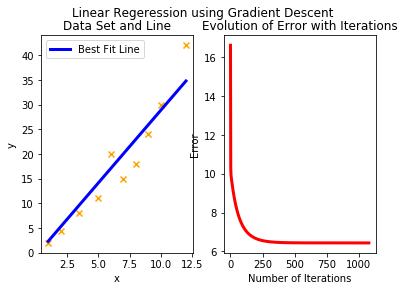

In [35]:
#plotting the results in matplotlib
fig , (ax1,ax2) = pyplot.subplots(1,2)
fig.suptitle('Linear Regeression using Gradient Descent')
ax1.scatter(xarr,yarr,marker="x",color='orange')
ax1.plot(xarr,m*xarr+c,linewidth=3,label='Best Fit Line',color='blue')
ax1.set_title('Data Set and Line')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()

er_x=np.arange(1, er_arr.size+1)
ax2.plot(er_x,er_arr,linewidth=3,color='red')
ax2.set_title('Evolution of Error with Iterations')
ax2.set_xlabel('Number of Iterations')
ax2.set_ylabel('Error')
pyplot.show()

**Answer 3:**

Bias and Variance are both measures/terms which are based on the selection of the model and/or their flexibility which decides how much the model can set onto the training data. 

Variance is basically a mathematical depiction of how much the model depends on a single data from training data, basically how much the model would change when any single datavalue is changed. High variance would mean the model changes a highly significantly on the change of a single datavalue (this obviously is not an ideal condition as we would prefer our models to more generalised whereas a lower variance would reflect a lack of high dependence of the model on the values. 

But the extent of generalisation also needs to be modulated and a lot of times it would need to capped at a particular point because extremely higher generalisation would mean that the model is moving considerably away from the actual values which in statistical terms would mean a higher bias which is also not ideal. Bias basically is the measure of the error induced due to the higher generalisation of a complex or inexisting relation.

A model with high variance and low bias would reflect an overfitting situation whereas one with extremely low variance and very high bias would mean an underfitting situation.

The thing of desire is a model with low variance and low bias which is not the easiest task as explained above because the decrease in one corresponds to the increase in other.


*(disclaimer: I still haven't completely read the first 2 chapters of ISLR)*